In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [45]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [86]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\방송통계포털\방송 사업자별 합산시청점유율 분석\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\방송통계포털\\방송 사업자별 합산시청점유율 분석\\005_DT_MEDIA01_0001_20230110095850.csv']

In [87]:
df = pd.read_csv(files[0],encoding='utf-8')
df.head()

,방송사업자별,시점,전체,본인[자사],특수관계자,지분 소유,구독률환산,기타,Unnamed: 8
0,한국방송공사,2012 년,36.163,32.566,3.378,.219,-,NaN,NaN
1,한국방송공사,2013 년,31.989,29.135,2.85,.004,-,NaN,NaN
2,한국방송공사,2014 년,31.21,28.425,NaN,NaN,NaN,2.785,NaN
3,한국방송공사,2015 년,27.777,24.498,NaN,NaN,NaN,3.279,NaN
4,한국방송공사,2016 년,27.583,24.066,3.517,0,-,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방송사업자별      2277 non-null   object 
 1   시점          2277 non-null   object 
 2   전체          2277 non-null   object 
 3   본인[자사]      2277 non-null   float64
 4   특수관계자       1727 non-null   object 
 5   지분 소유       1671 non-null   object 
 6   구독률환산       1557 non-null   object 
 7   기타          426 non-null    float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 160.2+ KB


In [89]:
df.describe()

,본인[자사],기타,Unnamed: 8
count,2277.000000,426.000000,0.0
mean,0.394032,2.415615,NaN
std,1.844921,5.017201,NaN
min,0.000000,0.000000,NaN
25%,0.001000,0.000000,NaN
50%,0.013000,0.007000,NaN
75%,0.159000,1.037750,NaN
max,32.566000,28.425000,NaN


In [90]:
df.describe(include=np.object)

,방송사업자별,시점,전체,특수관계자,지분 소유,구독률환산
count,2277,2277,2277,1727,1671,1557
unique,428,9,591,527,63,84
top,한국방송공사,2020 년,0,-,-,-
freq,9,294,164,741,1061,1423


In [91]:
df.drop(['Unnamed: 8'],axis=1,inplace=True)
df.fillna('0',inplace=True)

In [92]:
for c in df.columns:
    df[c] = df[c].apply(lambda x : '0' if x=='-' else x)

In [93]:
ratio_list = ['전체','본인[자사]','특수관계자','지분 소유','구독률환산','기타']
df[ratio_list] = df[ratio_list].astype('float')

## 시각화

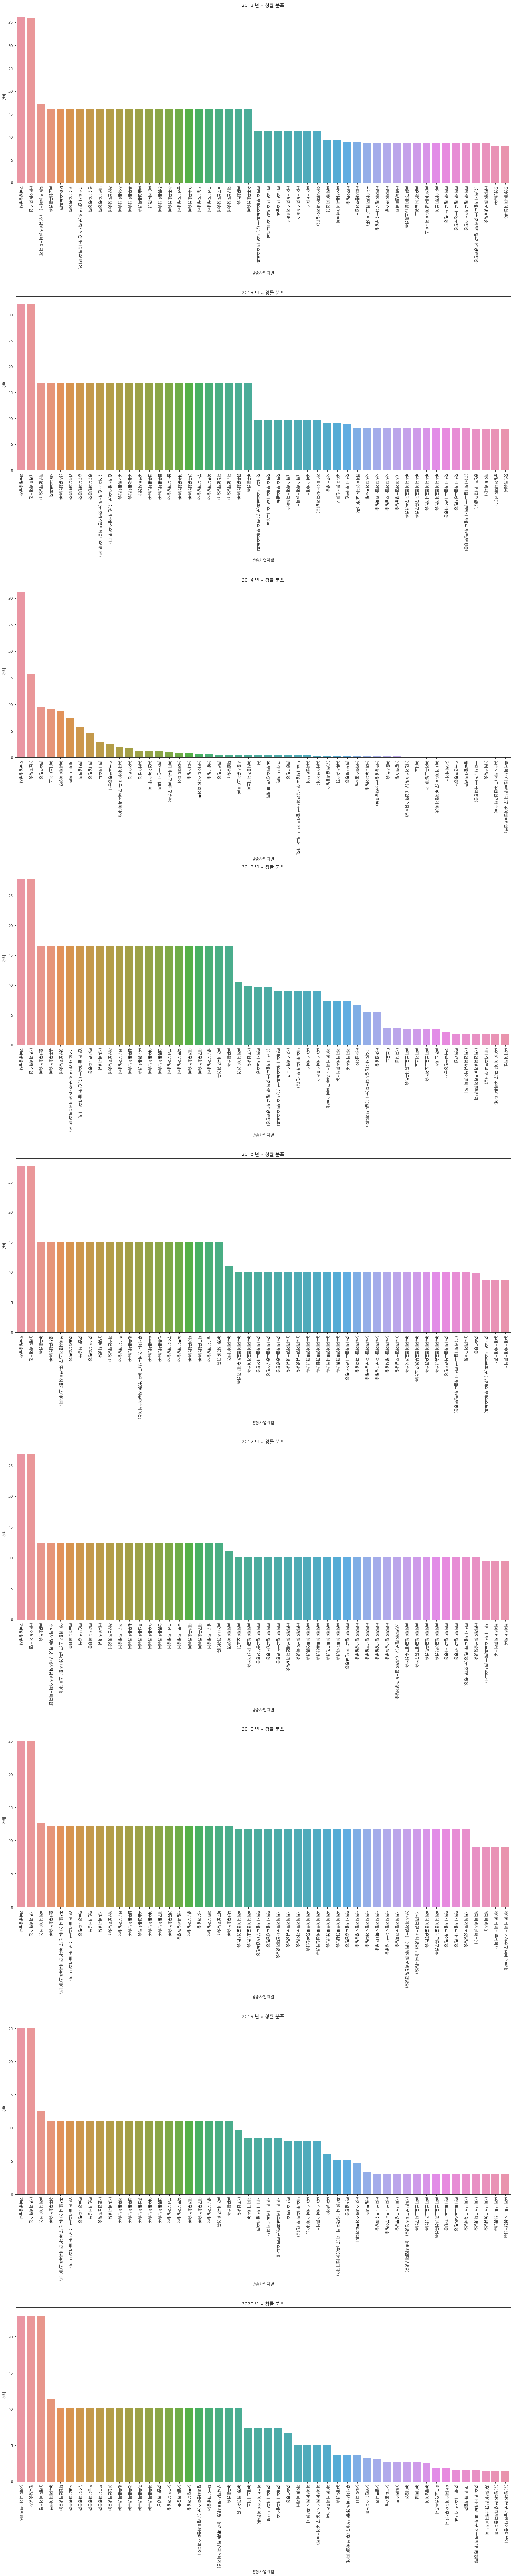

In [34]:
y_list = df['시점'].unique()
fig,axes = plt.subplots(len(y_list),1,figsize=(18,len(y_list)*10))
for i,y in enumerate(y_list):
    sub_df = df[df['시점']==y].sort_values('전체',ascending=False)
    sns.barplot(data=sub_df.head(50),x='방송사업자별',y='전체',ax=axes[i]).set(title=f'{y} 시청률 분포')
    g=axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)
plt.tight_layout()

                     방송사업자별         전체
419                  한국방송공사  28.265778
246                 ㈜케이비에스엔  24.772778
247              ㈜케이비에스엔씨앤씨  22.873000
35                  MBC스포츠㈜  16.402000
60                    ㈜문화방송  13.971333
203                ㈜엠비씨강원영동  12.884333
364  엠비씨플러스(구 (주)엠비씨플러스미디어)  12.363889
404                 청주문화방송㈜  12.344250
405                 충주문화방송㈜  12.343250
291                 ㈜포항문화방송  12.234556


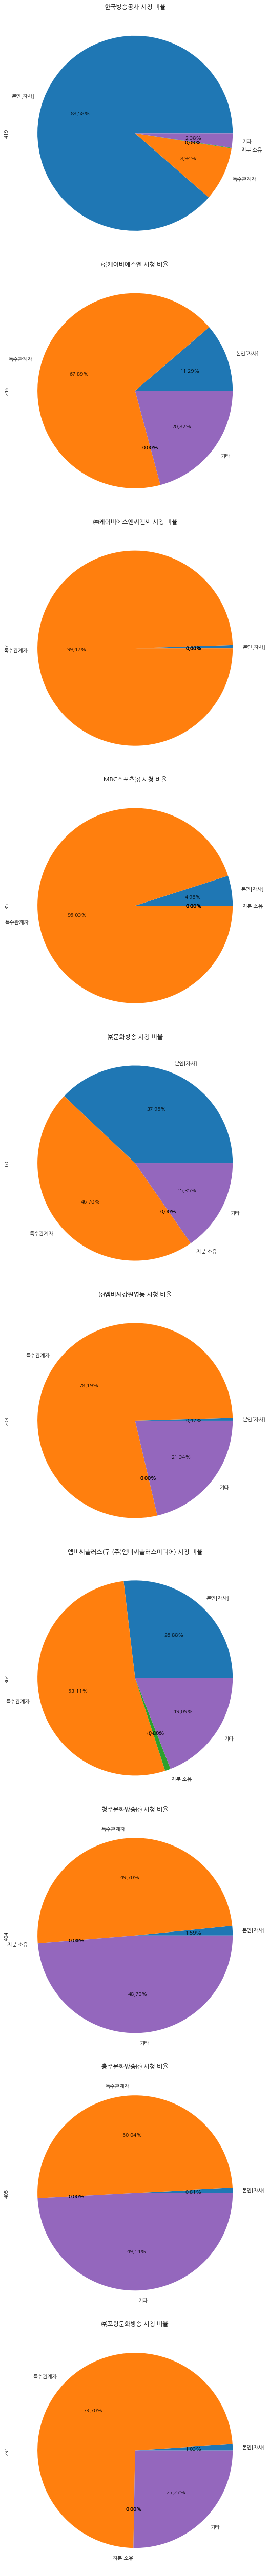

In [123]:
sub_df = df.groupby(['방송사업자별'],as_index=False)[ratio_list].mean().sort_values(ratio_list,ascending=False)
print(sub_df[['방송사업자별','전체']].head(10))
channel_list = sub_df.head(10)['방송사업자별'].unique()
fig,axes = plt.subplots(10,1,figsize=(7,70))
for i,c in enumerate(channel_list):
    sub_df.iloc[i][ratio_list[1:]].transpose().plot.pie(title=f'{c} 시청 비율',autopct='%.2f%%',ax=axes[i])
plt.tight_layout()